#  Pytorch  Neural Network Modelling
#What is Pytorch ?


![AI%20ML.jpeg](attachment:AI%20ML.jpeg)



### ABOUT NOTEBOOK

This notebook covers the following sections:

1. **Linear Models**: A simple linear regression example using synthetic data.
2. **Recurrent Neural Networks (RNNs)**: A basic RNN for time series prediction using synthetic sine wave data.
3. **Long Short-Term Memory Networks (LSTMs)**: An LSTM for time series prediction using synthetic sine wave data.
4. **Gated Recurrent Units (GRUs)**: A GRU for time series prediction using synthetic sine wave data.
5. **Convolutional Neural Networks (CNNs)**: A CNN for image classification using the MNIST dataset.

Each section includes the following components:
- **Model Definition**: Detailed description of the model architecture and components.
- **Data Generation/Preprocessing**: Steps for generating and preprocessing the data used for training and testing the models.
- **Training Loop**: The process of training the models, including loss computation and optimization.
- **Testing/Validation**: Evaluation of the models on test data to assess their performance.
- **Visualization (where applicable)**: Visual representation of the results to aid in understanding the model's performance and behavior.



In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Helper function for generating synthetic data
def generate_data(seq_length):
    time_series = np.sin(np.linspace(0, 100, seq_length))
    data = []
    for i in range(len(time_series) - 1):
        data.append((time_series[i:i+1], time_series[i+1]))
    return data

# Helper function for plotting results
def plot_results(predicted, actual, title):
    plt.figure(figsize=(10, 5))
    plt.plot(predicted, label='Predicted')
    plt.plot(actual, label='Actual')
    plt.title(title)
    plt.legend()
    plt.show()

# LINEAR MODELS

**Linear Models**:
Linear models are the simplest type of predictive model, where the relationship between the input variables and the output is assumed to be linear. The most common linear model is linear regression.

#### How Linear Models Work:
In a linear model, the output \( y \) is calculated as a weighted sum of the inputs \( x \), plus a bias term:
$\[ y = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b \]$
where \( w_i \) are the weights and \( b \) is the bias. The model parameters (weights and bias) are typically learned using optimization algorithms such as gradient descent, which minimizes a loss function like mean squared error (MSE).

#### Use Cases of Linear Models:
Linear models are widely used in various fields due to their simplicity and interpretability. Some common use cases include:
- **Regression Analysis**: Predicting continuous outcomes, such as house prices, sales forecasts, and medical measurements.
- **Classification**: Logistic regression, a type of linear model, is used for binary classification tasks such as spam detection and disease diagnosis.
- **Econometrics**: Analyzing economic data to understand relationships between variables, such as the impact of interest rates on investment.
- **Engineering**: Modeling physical systems where relationships between variables are approximately linear.



In [2]:

# Sample code for Linear Models
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

def train_linear_model():
    # Generate synthetic data
    x_train = torch.randn(100, 1)
    y_train = 3 * x_train + 2 + 0.2 * torch.randn(100, 1)

    # Model, loss, optimizer
    model = LinearModel(1, 1)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Training loop
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    print('Linear Model Training Completed')

    # Plotting results
    with torch.no_grad():
        predicted = model(x_train).numpy()
        actual = y_train.numpy()
        plot_results(predicted, actual, 'Linear Model Results')

Linear Model Training Completed


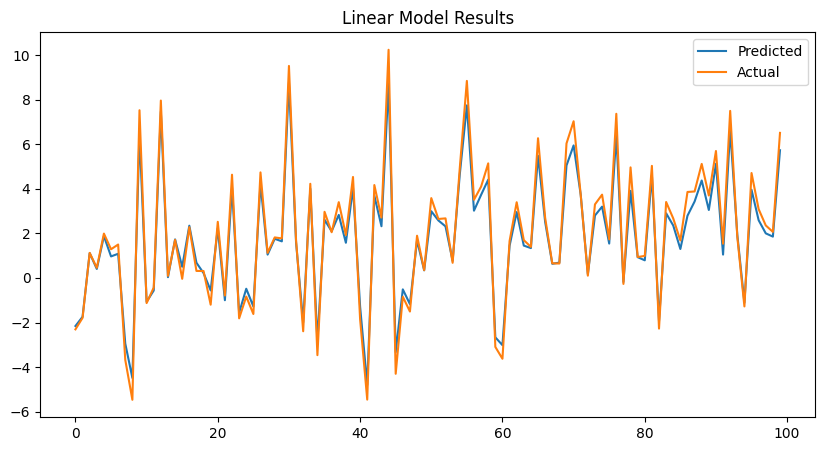

In [3]:
train_linear_model()

# RECURRENT NEURAL NETWORKS


**Recurrent Neural Networks (RNNs)**:
RNNs are a type of neural network designed to recognize patterns in sequences of data, such as time series, speech, and text. They use loops within the network to maintain information in what’s called the "hidden state," allowing them to capture temporal dynamics.

#### How RNNs Work:
In an RNN, the output from the previous time step is fed back into the network along with the current input. This feedback loop allows RNNs to maintain a memory

of previous inputs, enabling them to process sequences of data. The key components of an RNN are:

1. **Input Layer**: Takes the input data at each time step.
2. **Hidden Layer**: Maintains the hidden state, which captures information from previous time steps.
3. **Output Layer**: Produces the output at each time step.

The hidden state is updated at each time step using the current input and the previous hidden state, typically using an activation function like tanh or ReLU.

#### Use Cases of RNNs:
RNNs are versatile and can be applied to various sequence prediction and generation tasks. Some common use cases include:
- **Time Series Prediction**: Predicting future values in a sequence, such as stock prices or weather data.
- **Natural Language Processing (NLP)**: Tasks such as language modeling, text generation, machine translation, sentiment analysis, and speech recognition.
- **Music Generation**: Composing music by predicting the next note or chord in a sequence.
- **Video Analysis**: Understanding sequences of video frames for tasks such as activity recognition and video captioning.


In [4]:
#Sample code for an RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.linear(out[:, -1, :])
        return out

def train_rnn_model():
    # Generate synthetic data
    data = generate_data(100)
    data = [(torch.tensor(x, dtype=torch.float32).unsqueeze(0),
             torch.tensor(y, dtype=torch.float32).unsqueeze(0))
            for x, y in data]
    dataloader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)

    # Model, loss, optimizer
    model = RNNModel(1, 50, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        for seq, target in dataloader:
            optimizer.zero_grad()
            output = model(seq)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    print('RNN Model Training Completed')

    # Testing the model
    test_seq = torch.tensor(np.sin(np.linspace(0, 100, 100)), dtype=torch.float32).unsqueeze(0).unsqueeze(2)
    with torch.no_grad():
        test_output = model(test_seq)
    print(f'RNN Predicted next value: {test_output.item():.4f}')

In [5]:
train_rnn_model()

RNN Model Training Completed
RNN Predicted next value: -0.2637


# LONG SHORT  MEMORY NETWORKS


**Long Short-Term Memory Networks (LSTMs)**:
LSTMs are a type of recurrent neural network (RNN) architecture that is specifically designed to avoid the long-term dependency problem, which standard RNNs suffer from. They were introduced by Hochreiter and Schmidhuber in 1997 and have been refined and popularized since then.

#### How LSTMs Work:
LSTMs work by introducing a memory cell and three types of gates (input gate, forget gate, and output gate) to control the flow of information. Here’s a breakdown of these components:

1. **Memory Cell**: This cell stores values over arbitrary time intervals. The LSTM can read from, write to, and erase information from the cell, controlled by the gates.
2. **Input Gate**: Controls how much of the new information flows into the memory cell.
3. **Forget Gate**: Controls how much of the past information to forget.
4. **Output Gate**: Controls how much of the information from the memory cell is used to compute the output of the LSTM unit.

Each gate is a neural network layer with its weights, biases, and activation functions. They use the sigmoid function to output a value between 0 and 1, determining how much information to pass through.

#### Use Cases of LSTMs:
LSTMs are widely used in various sequence prediction problems due to their ability to remember long-term dependencies. Some common use cases include:
- **Time Series Forecasting**: Predicting stock prices, weather conditions, and other time-dependent data.
- **Natural Language Processing (NLP)**: Language modeling, text generation, machine translation, and speech recognition.
- **Anomaly Detection**: Identifying unusual patterns in data, which is useful in fraud detection and system monitoring.
- **Video Analysis**: Understanding sequences of video frames for tasks such as activity recognition and video captioning.


In [6]:
#Sample code for an LSTM model

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.linear(out[:, -1, :])
        return out

def train_lstm_model():
    # Generate synthetic data
    data = generate_data(100)
    data = [(torch.tensor(x, dtype=torch.float32).unsqueeze(0),
             torch.tensor(y, dtype=torch.float32).unsqueeze(0))
            for x, y in data]
    dataloader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)

    # Model, loss, optimizer
    model = LSTMModel(1, 50, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        for seq, target in dataloader:
            optimizer.zero_grad()
            output = model(seq)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    print('LSTM Model Training Completed')

    # Testing the model
    test_seq = torch.tensor(np.sin(np.linspace(0, 100, 100)), dtype=torch.float32).unsqueeze(0).unsqueeze(2)
    with torch.no_grad():
        test_output = model(test_seq)
    print(f'LSTM Predicted next value: {test_output.item():.4f}')

In [7]:
train_lstm_model()

LSTM Model Training Completed
LSTM Predicted next value: -0.6323


# GATED RECURRENT UNITS



**Gated Recurrent Units (GRUs)**:
GRUs are a type of recurrent neural network (RNN) architecture introduced by Cho et al. in 2014. They are similar to LSTMs but with a simplified structure, making them computationally more efficient.

#### How GRUs Work:
GRUs use two gates (reset gate and update gate) to control the flow of information:

1. **Reset Gate**: Determines how much of the previous hidden state to forget.
2. **Update Gate**: Controls how much of the new information to store in the current hidden state.

Unlike LSTMs, GRUs do not have a separate memory cell; instead, they directly operate on the hidden state. This simplicity can lead to faster training and inference times.

#### Use Cases of GRUs:
GRUs are used in similar applications as LSTMs, particularly when computational efficiency is important. Some common use cases include:
- **Time Series Prediction**: Forecasting future values in sequences such as stock prices and weather data.
- **Natural Language Processing (NLP)**: Language modeling, text generation, machine translation, and speech recognition.
- **Anomaly Detection**: Identifying unusual patterns in data for fraud detection and system monitoring.
- **Video Analysis**: Understanding sequences of video frames for tasks such as activity recognition and video captioning.

In [8]:
#Sample code for an GRU  model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.gru(x, h0)
        out = self.linear(out[:, -1, :])
        return out

def train_gru_model():
    # Generate synthetic data
    data = generate_data(100)
    data = [(torch.tensor(x, dtype=torch.float32).unsqueeze(0),
             torch.tensor(y, dtype=torch.float32).unsqueeze(0))
            for x, y in data]
    dataloader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)

    # Model, loss, optimizer
    model = GRUModel(1, 50, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        for seq, target in dataloader:
            optimizer.zero_grad()
            output = model(seq)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    print('GRU Model Training Completed')

    # Testing the model
    test_seq = torch.tensor(np.sin(np.linspace(0, 100, 100)), dtype=torch.float32).unsqueeze(0).unsqueeze(2)
    with torch.no_grad():
        test_output = model(test_seq)
    print(f'GRU Predicted next value: {test_output.item():.4f}')

In [9]:
train_gru_model()

GRU Model Training Completed
GRU Predicted next value: -0.5642


# CONVOLUTIONAL NEURAL NETWORKS




CNNs are a type of neural network architecture designed for processing structured grid data, such as images. They are particularly effective for tasks involving spatial hierarchies and local dependencies.

#### How CNNs Work:
CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers:

1. **Conv2D Block**: A convolutional layer that applies a set of learnable filters to the input image. Each filter slides over the image, performing element-wise multiplications and summing the results to produce a feature map. This operation captures local patterns such as edges, textures, and shapes.
2. **MaxPooling**: A pooling layer that reduces the spatial dimensions of the feature maps, retaining the most important information. MaxPooling typically takes the maximum value from a small window (e.g., 2x2) and helps in reducing the computational complexity and controlling overfitting.
3. **Fully Connected Layers**: Layers where each neuron is connected to every neuron in the previous layer. These layers are typically used at the end of the network to perform classification or regression based on the features extracted by the convolutional and pooling layers.

#### Example of Use Cases:
CNNs are widely used in various image and video processing tasks. Some common use cases include:
- **Image Classification**: Recognizing objects and scenes in images, such as identifying animals, vehicles, or faces.
- **Object Detection**: Detecting and localizing objects within an image, used in applications like autonomous driving and surveillance.
- **Image Segmentation**: Partitioning an image into regions or objects, used in medical imaging and autonomous driving.
- **Video Analysis**: Understanding sequences of video frames for tasks such as activity recognition, video captioning, and video classification.


In [10]:
#Sample code snippet using torchvision dataset
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_cnn_model():
    # Use MNIST dataset for image classification
    from torchvision import datasets, transforms

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

    # Model, loss, optimizer
    model = CNNModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(5):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/5], Loss: {running_loss/len(trainloader):.4f}')

    print('CNN Model Training Completed')

In [34]:
train_cnn_model()

In [ ]:
!pip install torchvision

In [ ]:
from torchvision import datasets

In [ ]:
train_cnn_model()